<a href="https://colab.research.google.com/github/Khanayan27/Projects/blob/main/Alibaba_Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [7]:
df = pd.read_csv('Ali_Baba_Stock_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2617 non-null   object 
 1   Adj Close  2617 non-null   float64
 2   Close      2617 non-null   float64
 3   High       2617 non-null   float64
 4   Low        2617 non-null   float64
 5   Open       2617 non-null   float64
 6   Volume     2617 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 143.2+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'])



*   changing the Dtype of column Date




In [9]:
df.describe()

,Date,Adj Close,Close,High,Low,Open,Volume
count,2617,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2.617000e+03
mean,2019-11-30 14:35:26.709973248,130.763001,135.153905,136.919684,133.360942,135.248746,1.899231e+07
min,2014-09-19 00:00:00,55.424198,57.389999,58.650002,57.200001,57.299999,3.775300e+06
25%,2017-04-26 00:00:00,82.445793,84.849998,85.699997,84.000000,85.000000,1.186070e+07
50%,2019-11-29 00:00:00,105.469185,108.989998,110.650002,107.260002,108.500000,1.600840e+07
75%,2022-07-07 00:00:00,173.061798,179.199997,181.389999,177.000000,179.369995,2.172430e+07
max,2025-02-13 00:00:00,306.276886,317.140015,319.320007,308.910004,313.500000,2.718794e+08
std,NaN,56.741744,58.951556,59.579593,58.244218,59.037467,1.291504e+07


In [10]:
df[['Open','Low','High','Close','Adj Close']].corr()

,Open,Low,High,Close,Adj Close
Open,1.000000,0.999546,0.999582,0.999105,0.999004
Low,0.999546,1.000000,0.999471,0.999596,0.999523
High,0.999582,0.999471,1.000000,0.999620,0.999515
Close,0.999105,0.999596,0.999620,1.000000,0.999916
Adj Close,0.999004,0.999523,0.999515,0.999916,1.000000


In [11]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-09-19,90.673950,93.889999,99.699997,89.949997,92.699997,271879400
1,2014-09-22,86.810966,89.889999,92.949997,89.500000,92.699997,66657800
2,2014-09-23,84.184128,87.169998,90.480003,86.620003,88.940002,39009800
3,2014-09-24,87.467667,90.570000,90.570000,87.220001,88.470001,32088000
4,2014-09-25,85.874191,88.919998,91.500000,88.500000,91.089996,28598000


In [12]:
df=df.sort_values(by = "Date")

In [13]:
earliest_date=df['Date'].min()
print('Earliest_date: ',earliest_date)

Earliest_date:  2014-09-19 00:00:00


In [14]:
latest_date=df['Date'].max()
print('Latest_date: ',latest_date)

Latest_date:  2025-02-13 00:00:00


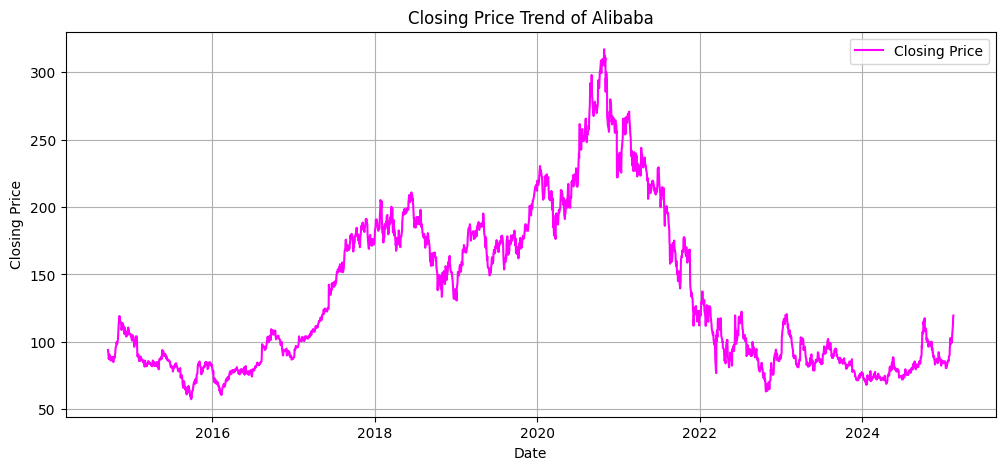

In [21]:
plt.figure(figsize = (12,5))
plt.plot(df['Date'],df['Close'],label = 'Closing Price',color='magenta')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Trend of Alibaba')
plt.legend()
plt.grid(True)
plt.show()

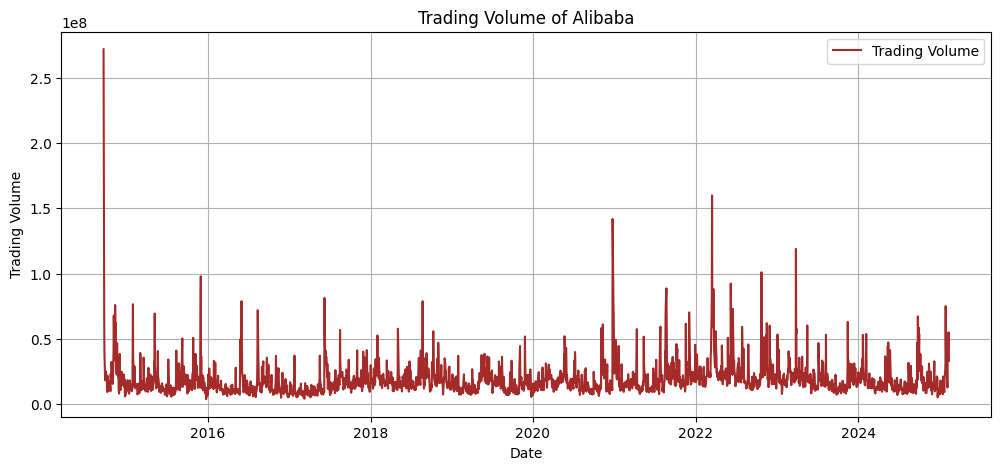

In [24]:
plt.figure(figsize = (12,5))
plt.plot(df['Date'],df['Volume'],label = 'Trading Volume',color='brown')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Trading Volume of Alibaba')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
#calculating Moving Average
df['MA_50']=df['Close'].rolling(window = 50).mean() #50 Day Moving Average
df['MA_200']=df['Close'].rolling(window = 200).mean() #200 Day Moving Average

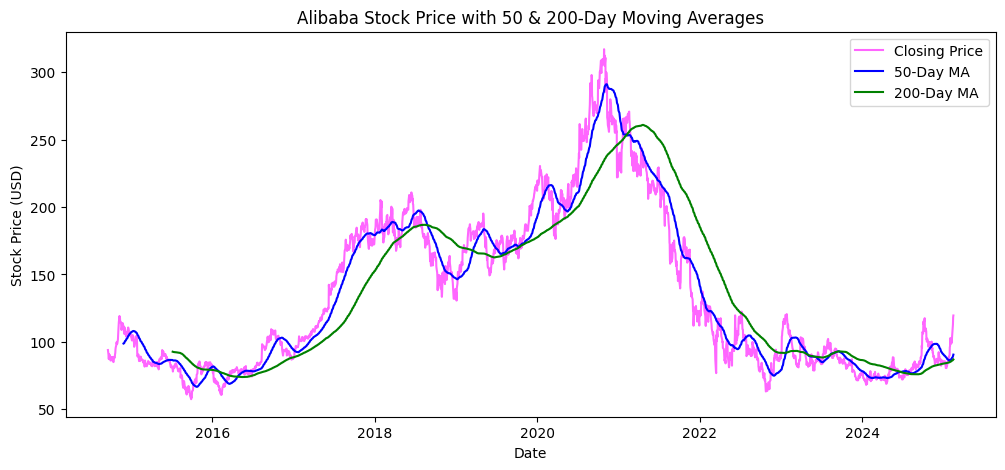

In [31]:
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='magenta', alpha=0.6)
plt.plot(df['Date'], df['MA_50'], label='50-Day MA', color='blue')
plt.plot(df['Date'], df['MA_200'], label='200-Day MA', color='green')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Alibaba Stock Price with 50 & 200-Day Moving Averages")
plt.legend()
plt.show()

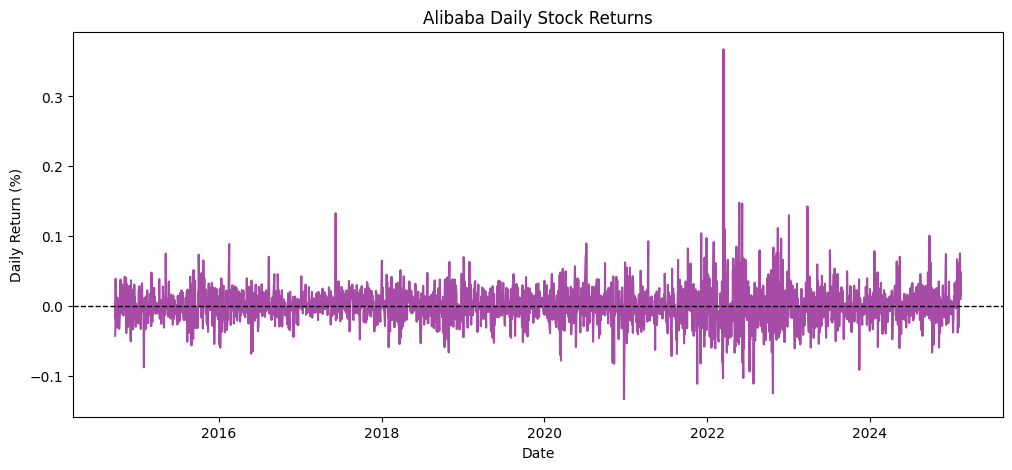

In [32]:
df['Daily_Return'] = df['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Daily_Return'], color='purple', alpha=0.7)
plt.axhline(0, linestyle="--", color='black', linewidth=1)
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.title("Alibaba Daily Stock Returns")
plt.show()

<ipython-input-34-fb606955f0af>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="plasma")


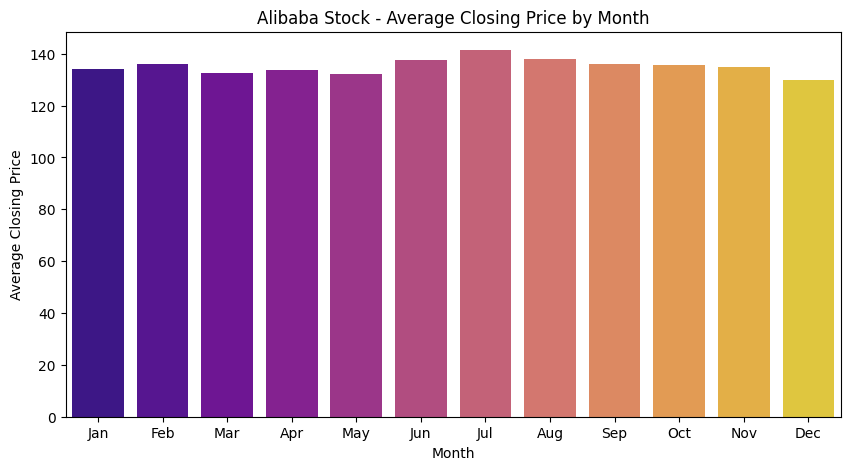

In [34]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by month to find average stock price per month
monthly_avg = df.groupby('Month')['Close'].mean()

# Plot seasonal trend
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="plasma")
plt.xlabel("Month")
plt.ylabel("Average Closing Price")
plt.title("Alibaba Stock - Average Closing Price by Month")
plt.xticks(range(0, 12),
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [37]:
# Rename columns to match Prophet's format
df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize the model
model = Prophet()

# Fit the model
model.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpirvwssaj/fspvcde0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpirvwssaj/8gwhupl4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71001', 'data', 'file=/tmp/tmpirvwssaj/fspvcde0.json', 'init=/tmp/tmpirvwssaj/8gwhupl4.json', 'output', 'file=/tmp/tmpirvwssaj/prophet_modelt1ahwcts/prophet_model-20250215190530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:05:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:05:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


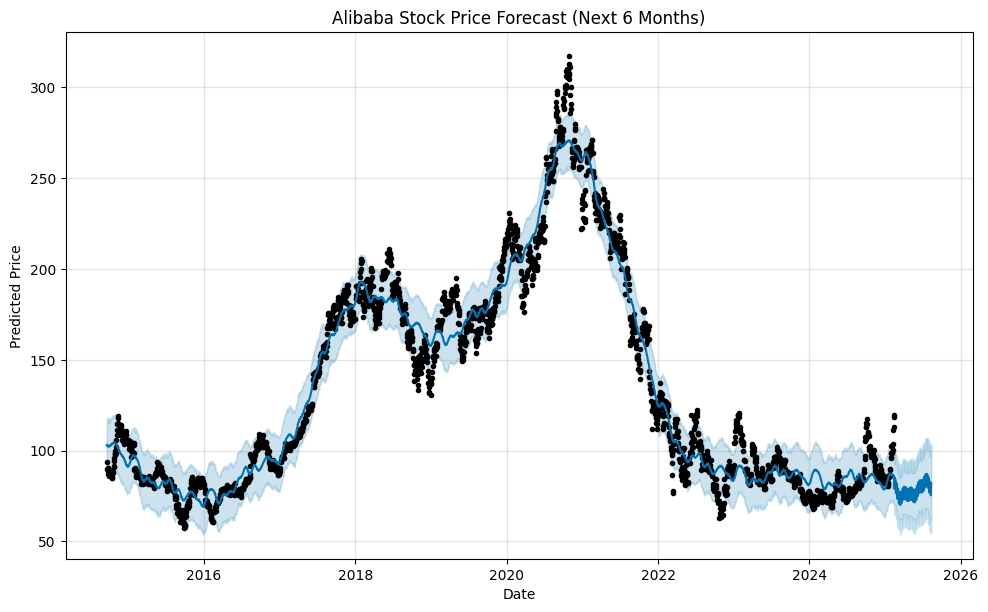

In [41]:
# Create future dates (6 months ahead)
future_dates = model.make_future_dataframe(periods=180)

# Predict stock prices
forecast = model.predict(future_dates)

# Plot forecast
fig = model.plot(forecast)
plt.title("Alibaba Stock Price Forecast (Next 6 Months)")
plt.xlabel("Date")
plt.ylabel("Predicted Price")
plt.show()

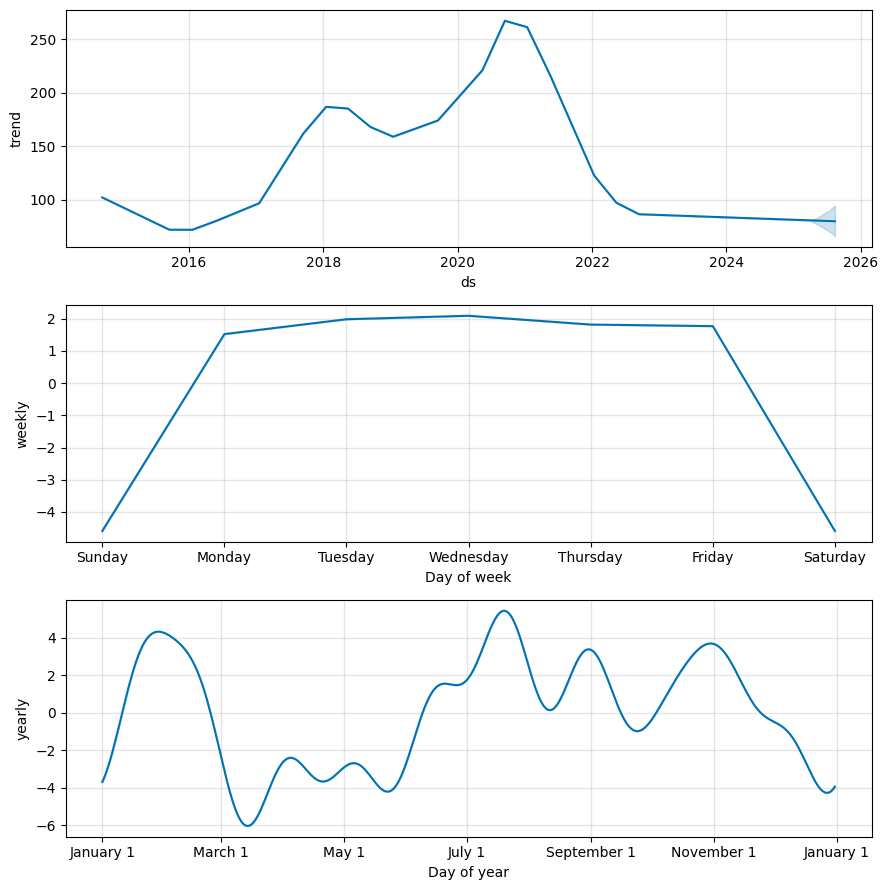

In [43]:
fig2 = model.plot_components(forecast)
plt.show()